# FLOWER IMAGE CLASSIFIER USING PYTORCH AND TENSORFLOW

The URL Link for the Blog is : https://rutvijkulkarni.tech/flower-image-classifier-using-pytorch-and-tensorflow/ 

# LOADING THE LIBRARIES AND THE DATASET.

The libraries which we need will be the normal pandas, numpy, matplotlib. We have used Pytorch (torch), as this was the main task assiged to us. the tensorflow library has done amazing tasks in the formation of CNN network to understand and define Image classifier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2
import pickle
import torch
import os

Since, It is not possible to upload a whole file directory, So I had uploaded the file in the Google Drive, and then to mount the file from the Drive to the colab, I have used to following code.

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
ls drive/MyDrive/flowers/

daisy/  dandelion/  rose/  sunflower/  tulip/


In [4]:
data_dir = 'drive/MyDrive/flowers'

From the YouTube video : "https://www.youtube.com/watch?v=POO1gdUJ7yE&t=9s&ab_channel=Md.IqbalHossain", I have used the idea of using the idea of categories idea, to create a categories list and the append the names.

The data list is an empty list which will store the values of the images, which will be used later

In [5]:
categories = ['daisy','dandelion','rose','sunflower','tulip']

data =[]

Since google Colab doesn't allow the cv2.imshow() command, The below mentioned command was used so that we can see the image.

In [6]:
from google.colab.patches import cv2_imshow

Contribution : 40%. : Improvised the for loop and try and except method with changing various parameters like image size (tried sizes 228,50 etc.)

In the function, "Convert_Image()", We have done numerous things, starting from :    


1.   Using the for function, we iterate through the items in the categories list, where we join the path of the image folder by accessing it through the "os" library
2.   We will be converting the image into RGB, using the BGR2RGB, function. We use this so that the image will be normalized and the randomness from the image will be less.
3. To resize, we will be using the resize() image, because all the images can be of different sizes, and to standardize the images, its better to have them in one size. I have choosen the size of the image as 224 x 224. 
4.  Numpy array or np.array() is one of the most powerful array or list type to store the numerical value. The np.array has a powerful execution time and consumes less memory compared to normal arrays. 
5.  We will be storing this value in the data array, which we created earlier. This array will store the numerical value for the image which we are iterating through. 
6.  The pickle module keeps track of the objects it has already serialized. You can visit the official website for more details : https://docs.python.org/3/library/pickle.html. Serialization refers to the process of converting an object in memory to a byte stream that can be stored on disk or sent over a network.
[DataCamp, *Python Pickle tutorial with object serilization*. DataCamp, April 15th 2018]
7.  From the website : https://greedhead.net/what-does-pickle-dump-do/ Para 8, we can see that what pickle.dump() exactly does. "The PLSQL DUMP function is used to return a varchar2 value that contains the datatype code, the length in bytes, and the internal representation of the expression. The PLSQL DUMP function accepts an expression as a parameter, if the expression value is NULL, then the DUMP function returns NULL." [Unknown, GreedHead. Unknown]. 

Once this is done, we will print the length of the total number of images that has been processed. 

In [8]:
def convert_image():
  for category in categories:
    path = os.path.join(data_dir,category)
    label = categories.index(category)
    for name in os.listdir(path):
      imgpath = os.path.join(path,name)
      img = cv2.imread(imgpath)
      try:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224,224))
        img = np.array(img, dtype = np.float32)
        data.append([img,label])
      except Exception as e:
        pass
  print(len(data))
  pik = open('flowers.pickle','wb')
  pickle.dump(data,pik)
  pik.close()
convert_image()

4317


In the load_data() Function, we have used the above developed pickle file called as "flowers.pickle" in "rb" or read mode. This allows us to unload the serialized binary file to be able to read and understand it. We will randonly choose the data inputs from the data list, to make sure that the data doesn't overfit. 
In the data, we will be iterating through 2 variables and assigning them to the image name and the feature variable.

**Reference : " https://www.youtube.com/watch?v=POO1gdUJ7yE&t=9s&ab_channel=Md.IqbalHossain" 
Contribution : 20%. Changed the idea of using the variable and tuned the parameter as image. Used the idea of using feature = feature / 255.**

In [9]:
def load_data():
  pi = open('flowers.pickle','rb')
  data = pickle.load(pi)
  pi.close()


  np.random.shuffle(data)

  feature=[]
  labels=[]
  for img,label in data:
    feature.append(img)
    labels.append(label)

  feature = np.array(feature, dtype=np.float32)
  labels = np.array(labels)

  feature = feature/255 

  return [feature,labels]

# USING TERNSORFLOW TO BUILD MODEL

Reference : 
[1] " https://www.youtube.com/watch?v=POO1gdUJ7yE&t=9s&ab_channel=Md.IqbalHossain" , 
[2] "https://medium.datadriveninvestor.com/overview-of-different-optimizers-for-neural-networks-e0ed119440c3" 


Contribution : 40%.
Changed the input layer's dimensions, tuned it to get the finest output.
Used variations of filter's, kernel size and changed the activation function to "ReLu" to produce a non-linear function for the model.
Changed the optimizer from "ADAM" or "Adaptive Moment Estimation" to "ADADELTA". 

*  Adadelta is an extension of Adagrad and it also tries to reduce Adagrad’s aggressive, monotonically reducing the learning rate.
*  It does this by restricting the window of the past accumulated gradient to some fixed size of w. Running average at time t then depends on the previous average and the current gradient.
*  In Adadelta we do not need to set the default learning rate as we take the ratio of the running average of the previous time steps to the current gradient. 

The Image below shows us the formula for the Adadelta optimizer.

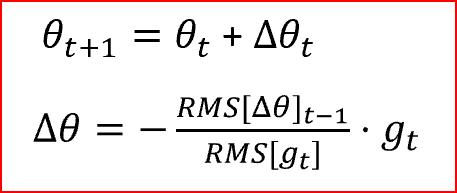

[2]

In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
(feature, labels) = load_data()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(feature, labels, test_size = 0.1)

In [12]:
categories = ['daisy','dandelion','rose','sunflower','tulip']

In this section we have given the shape of the input layer in the neural 

network that feeds our model to be trained.

In [13]:
input_layer = tf.keras.layers.Input([224,224,3])

In [14]:
layer_1 = tf.keras.layers.Conv2D(filters = 32,kernel_size = (5,5),padding = 'Same',activation = 'relu')(input_layer)
pol1 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(layer_1)

layer_2 = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',activation = 'relu')(pol1)
pol2 = tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides = (2,2))(layer_2)

layer_3 = tf.keras.layers.Conv2D(filters = 96, kernel_size = (3,3), padding = 'Same',activation = 'relu')(pol2)
pol3 = tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides = (2,2))(layer_3)

layer_4 = tf.keras.layers.Conv2D(filters = 96,kernel_size = (3,3),padding = 'Same',activation = 'relu')(pol3)
pol4 = tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=(2,2))(layer_4)

In [15]:
flt1 = tf.keras.layers.Flatten()(pol4)

den1 = tf.keras.layers.Dense(512,activation = 'relu')(flt1)

out = tf.keras.layers.Dense(5,activation = 'softmax')(den1)

In [16]:
model = tf.keras.Model(input_layer,out)
model.compile(optimizer = 'adadelta',loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

While fitting the model, it is important to make sure that the epochs are in the right proportion so that the model wont face issues like overfiting or underfitting.

In [17]:
model.fit(x_train, y_train,batch_size = 100, epochs = 10)

Epoch 1/10
39/39 [==============================] - 463s 12s/step - loss: 1.4482 - accuracy: 0.3712
Epoch 2/10
39/39 [==============================] - 463s 12s/step - loss: 1.0958 - accuracy: 0.5472
Epoch 3/10
39/39 [==============================] - 466s 12s/step - loss: 0.9794 - accuracy: 0.6106
Epoch 4/10
39/39 [==============================] - 468s 12s/step - loss: 0.8822 - accuracy: 0.6533
Epoch 5/10
39/39 [==============================] - 465s 12s/step - loss: 0.7708 - accuracy: 0.7107
Epoch 6/10
39/39 [==============================] - 470s 12s/step - loss: 0.6755 - accuracy: 0.7457
Epoch 7/10
39/39 [==============================] - 468s 12s/step - loss: 0.5454 - accuracy: 0.7995
Epoch 8/10
39/39 [==============================] - 469s 12s/step - loss: 0.4289 - accuracy: 0.8409
Epoch 9/10
39/39 [==============================] - 470s 12s/step - loss: 0.3052 - accuracy: 0.8888
Epoch 10/10
39/39 [==============================] - 485s 12s/step - loss: 0.2043 - accuracy: 0.9256

We can see that the model achieved an overall accuracy of 92.56%.

In [18]:
model.save('Classifier.h5')

Let's see how our model has performed aganist the test data. We will be using matplotlib to see the actual answer which is the category and predicted answer from our model which is prediction.

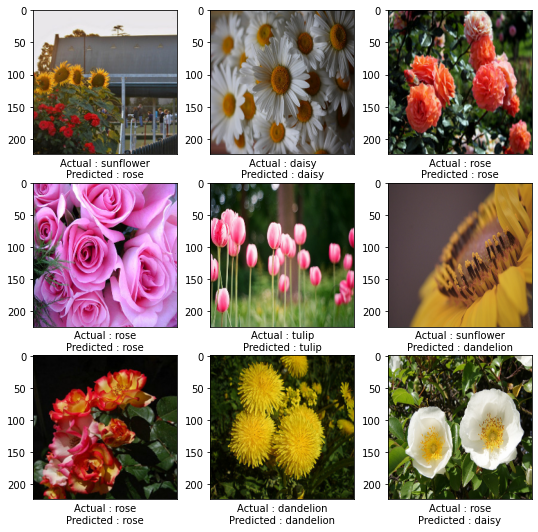

In [19]:
prediction = model.predict(x_test)
plt.figure(figsize = (9,9))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i])
  plt.xlabel('Actual : '+categories[y_test[i]] + '\n' + 'Predicted : ' + categories[np.argmax(prediction[i])])
  plt.xticks([]) 
plt.show()

# DIFFCULTIES FACED. 

The most difficult part faced was that the model consumes exponential amount of RAM, as you can see below. The system sometimes crashes because of that. Although the accuracy is in the fair amount, the system needs to be developed in a memory efficient manner. I have managed to reduce the number of layers that caused the complexity even though the accuracy was not much affected, but further changes are affecting it. The model using ReLu non-liear method makes it easy but the optimizer function is consuming time.

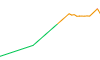